# GAN Construction

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2024-04-02 13:05:39.333146: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-02 13:05:39.333305: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-02 13:05:39.517003: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 17s 0us/step


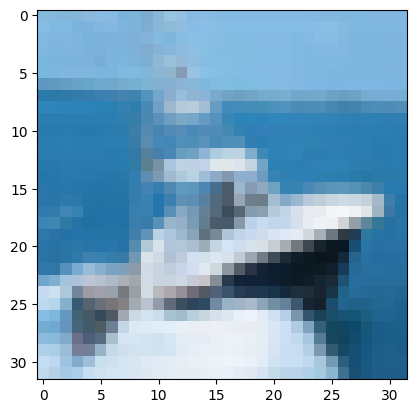

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_train[8])

In [5]:
x_train.shape

(50000, 32, 32, 3)

# constructing Discriminator

In [6]:
import keras
from keras import layers

In [7]:
model = keras.Sequential(
    [   layers.Conv2D(64,(3,3),padding='same',input_shape=(32,32,3)),#Here for downsampling we use 
                                                                 #    strides instead of maxpooling because for Gan's the strides give more accuracy
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(64,(3,3),padding='same',input_shape=(32,32,3)),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(128,(3,3),padding='same',strides=(2,2),input_shape=(32,32,3)),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(128,(3,3),padding='same',strides=(2,2),input_shape=(32,32,3)),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(256,(3,3),padding='same',strides=(2,2),input_shape=(32,32,3)),
        layers.LeakyReLU(alpha=0.2),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(1,activation='sigmoid')
    ]
)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
/opt/conda/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [8]:
model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    name="adam",
    ),metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         4,097 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 559,425 (2.13 MB)

 Trainable params: 559,425 (2.13 MB)

 Non-trainable params: 0 (0.00 B)

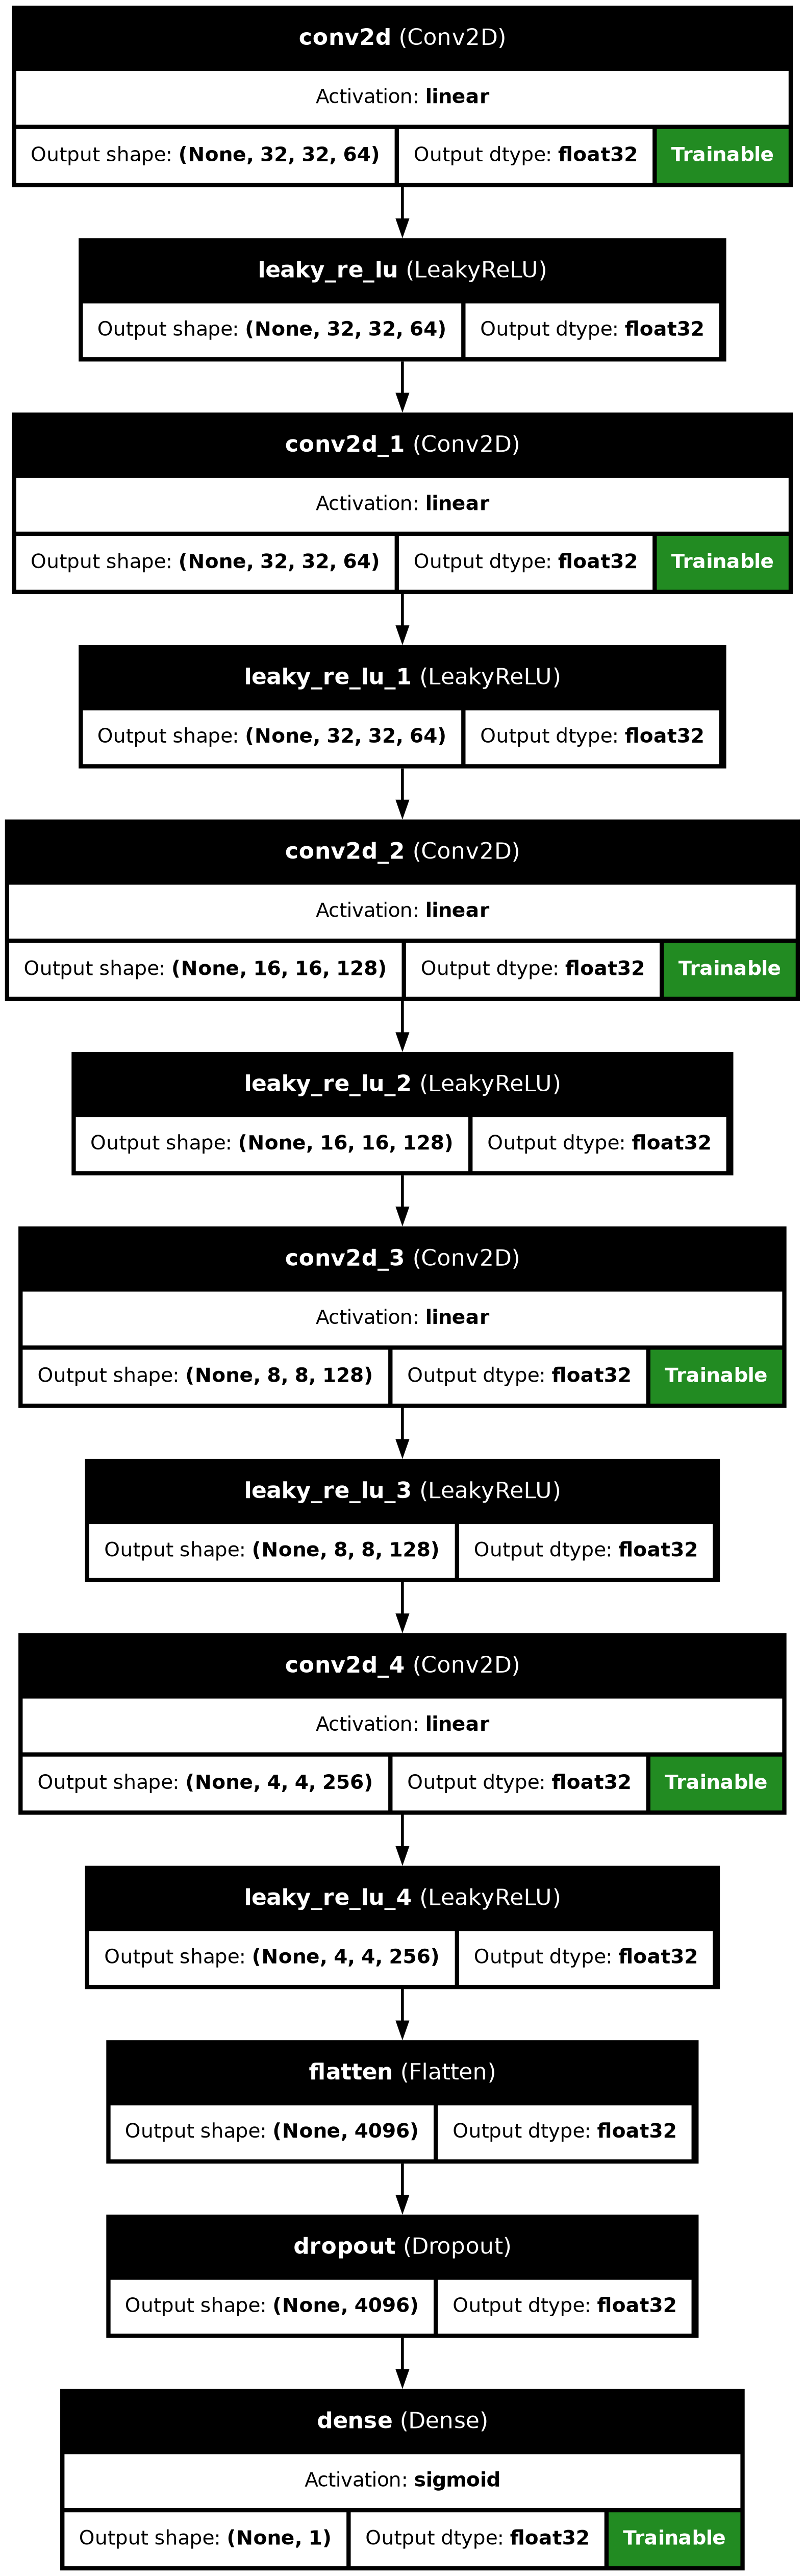

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=True,
    dpi=200,
    show_layer_activations=True,
    show_trainable=True,

)

In [ ]:
x_train=x_train.astype('float32')
x_train=(x_train-127.5)/127.5#here we are scaling not from 0 to 1 but from -1 to 1 because in later case we will use tanh function
x_train

array([[[[-0.5372549 , -0.5137255 , -0.5058824 ],
         [-0.6627451 , -0.6392157 , -0.64705884],
         [-0.60784316, -0.62352943, -0.6627451 ],
         ...,
         [ 0.23921569,  0.03529412, -0.15294118],
         [ 0.19215687, -0.01960784, -0.2       ],
         [ 0.16078432, -0.02745098, -0.19215687]],

        [[-0.8745098 , -0.84313726, -0.84313726],
         [-1.        , -1.        , -1.        ],
         [-0.85882354, -0.9372549 , -1.        ],
         ...,
         [-0.03529412, -0.30980393, -0.5686275 ],
         [-0.06666667, -0.34901962, -0.60784316],
         [-0.04313726, -0.31764707, -0.5529412 ]],

        [[-0.8039216 , -0.8117647 , -0.8352941 ],
         [-0.8745098 , -0.94509804, -1.        ],
         [-0.6156863 , -0.7882353 , -0.9372549 ],
         ...,
         [-0.07450981, -0.34117648, -0.60784316],
         [-0.05882353, -0.34117648, -0.60784316],
         [-0.14509805, -0.42745098, -0.67058825]],

        ...,

        [[ 0.6313726 ,  0.33333334, -0

# Generating real samples

In [ ]:
def generate_real_data(x_train):
    index = np.random.randint(0, len(x_train), 100)
    samples = x_train[index]
    y1 = np.ones((100, 1))
    return samples, y1

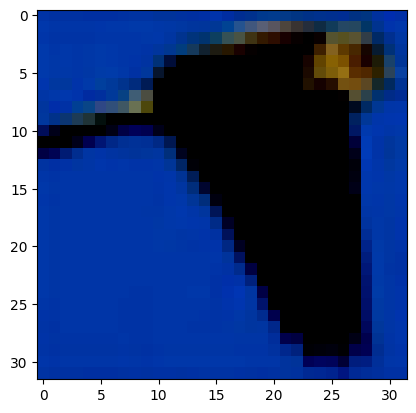

In [13]:
x,y=generate_real_data(x_train)
plt.imshow(x[12])

# Generating Fake Samples

In [14]:
def generate_fake_data():
    index2 = np.random.rand(32 * 32 * 3 * 100)
    index2 = -1 + 2 * index2
    index2 = index2.reshape(100, 32, 32, 3)
    y2 = np.ones((100, 1))
    return index2, y2

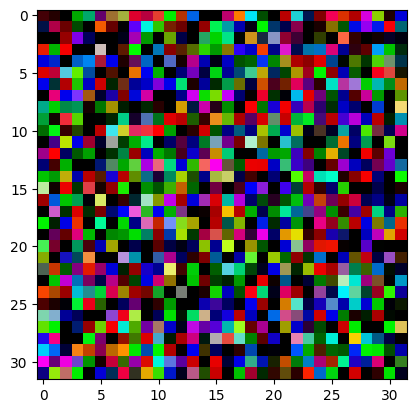

In [15]:
x,y=generate_fake_data()
plt.imshow(x[4])

# Training Discriminator

*# here the best practise to train is,instead of sending real and fake images randomly we will train real batch one time and fake batch one time. so 2 updations on one epoch*

In [16]:
for i in range(30):# no of epochs
    x1,y1=generate_real_data(x_train)
    _,acc_real=model.train_on_batch(x1,y1)
    x2,y2=generate_fake_data()
    _,acc_fake=model.train_on_batch(x2,y2)
    print(i+1)
    print(acc_real*100)
    print(acc_fake*100)

1
37.00000047683716
68.50000023841858
2
79.00000214576721
84.24999713897705
3
87.40000128746033
89.49999809265137
4
91.00000262260437
92.12499856948853
5
93.00000071525574
93.69999766349792
6
94.2727267742157
94.74999904632568
7
95.15384435653687
95.49999833106995
8
95.80000042915344
96.06249928474426
9
96.29411697387695
96.49999737739563
10
96.68421149253845
96.8500018119812
11
97.00000286102295
97.13636636734009
12
97.26086854934692
97.37499952316284
13
97.47999906539917
97.57692217826843
14
97.66666889190674
97.75000214576721
15
97.82758355140686
97.89999723434448
16
97.96774387359619
98.03125262260437
17
98.09091091156006
98.14705848693848
18
98.19999933242798
98.25000166893005
19
98.29729795455933
98.34210276603699
20
98.3846127986908
98.4250009059906
21
98.46341609954834
98.50000143051147
22
98.53488206863403
98.56818318367004
23
98.60000014305115
98.63043427467346
24
98.65957498550415
98.68749976158142
25
98.71428608894348
98.73999953269958
26
98.76470565795898
98.78846406936646

# until now we checked and trained model using our custom fake data now we will see using generator

In [17]:
nodes=256*4*4# 4*4 is a good start as regarding with experimentation results
def define_generator(latent_dim):# we are giving 100 dimensional noise shape and we are trying to get 32*32*3 as the output
    model = keras.Sequential([
        layers.Dense(4096, input_dim=latent_dim),
        layers.LeakyReLU(alpha=0.2),
        layers.Reshape((4, 4, 256)),# we are trying to get hidden 256 differnt representations by taking 100 dimientional data as input
        layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'),# here we got 32X32
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(3, (3, 3), activation='tanh', padding='same')#3 filters represents RGB
    ])
    return model

# Example usage:
latent_dim=100  # Example latent dimension
model2= define_generator(latent_dim)


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [18]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 4096)           │       413,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 8, 8, 128)      │       524,416 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 16, 16, 128)    │       262,272 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 32, 32, 128)    │       262,272 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 3)      │         3,459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,466,115 (5.59 MB)

 Trainable params: 1,466,115 (5.59 MB)

 Non-trainable params: 0 (0.00 B)

# Generating multiple fake images equal to real images

In [19]:
# generating 100 differnt 100 dimension points for sending to the discriminator
# the best results came when genrator took noise from Gaussian distribution so we used randn
def generate_points(latent_dim,no_of_samples):
    x=np.random.randn(no_of_samples*latent_dim)
    x=x.reshape(no_of_samples,latent_dim)
    return x

In [20]:
k=generate_points(100,100)
print(k.shape)

(100, 100)


In [21]:
def fake_samples_generator(model):
    x=generate_points(100,100)
    X=model.predict(x)
    y=np.zeros((100,1))
    return X,y

In [22]:
x,y=fake_samples_generator(model2)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step


In [23]:
x=(x+1)/2.0# we are scaling because its easy to represent this
x.shape

(100, 32, 32, 3)

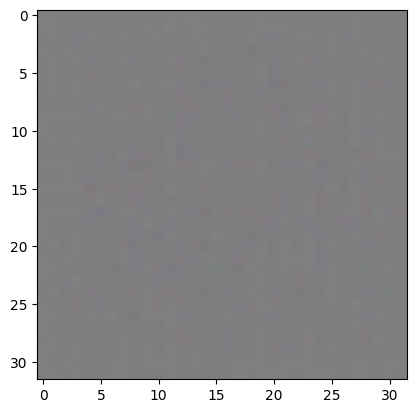

In [24]:
plt.imshow(x[0])# this is the starting fake image generated by the generator model

# Building GAN MODEL

In [65]:
def gan(generator,discriminator):
    discriminator.trainable=False
    model=keras.Sequential(
    [
        generator,
        discriminator
    ])
    model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    name="adam",
    ))
    return model

In [110]:
discriminator = keras.Sequential(
    [   layers.Conv2D(64,(3,3),padding='same',input_shape=(32,32,3)),#Here for downsampling we use 
                                                                 #    strides instead of maxpooling because for Gan's the strides give more accuracy
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(64,(3,3),padding='same',input_shape=(32,32,3)),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(128,(3,3),padding='same',strides=(2,2),input_shape=(32,32,3)),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(128,(3,3),padding='same',strides=(2,2),input_shape=(32,32,3)),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(256,(3,3),padding='same',strides=(2,2),input_shape=(32,32,3)),
        layers.LeakyReLU(alpha=0.2),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(1,activation='sigmoid')
    ]
)


In [111]:
discriminator.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    name="adam",
    ),metrics=['accuracy'])

In [112]:
generator=define_generator(100)

In [113]:
gan_model=gan(generator,discriminator)
gan_model.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_18 (Sequential)      │ ?                      │     1,466,115 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_17 (Sequential)      │ ?                      │       559,425 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,025,540 (7.73 MB)

 Trainable params: 1,466,115 (5.59 MB)

 Non-trainable params: 559,425 (2.13 MB)

In [124]:
def train(gan_model,generator,discriminator):
    for i in range(400):
        for j in range(x_train.shape[0]//100):
            x_real,y_real=generate_real_data(x_train)
            loss1,_=discriminator.train_on_batch(x_real,y_real)
            x_fake,y_fake=fake_samples_generator(generator)
            loss2,_=discriminator.train_on_batch(x_fake,y_fake)
        
            x_gan=generate_points(100,100)
            x_gan=(x_gan+1)/2.0
            y_gan=np.ones((100,1))
#             print(x_gan)
#             print(y_gan[4])
#             print(x_gan.shape,y_gan.shape)
            loss_gan=gan_model.train_on_batch(x_gan,np.ones((100,1)))
#             =gan_model.train_on_batch(x_gan,y_gan)
            print(loss1,loss2)
            
            
            
            
            
        

In [ ]:
train(gan_model,generator,discriminator)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step 
0.6889698 0.6892858
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step 
0.6892295 0.6895691
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step 
0.6895379 0.68983793
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step 
0.68979484 0.6901251
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
0.6900677 0.6903857
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step 
0.69034296 0.6906363
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step 
0.6905662 0.69085824
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step 
0.6908054 0.6910891
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step 
0.6910142 0.69129795
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step 
0.69123894 0.69152063
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step 
0.6914984 0.69176537
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step 
0.6917108 0.6919828
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step 
0.6919312 0.6922071
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step 
0.6921571 0.6924122
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step 
0.69235235 0.6926108
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step 
0.69255143 0.69281805
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step 
0.6927